In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# reading the csv file
dataset = "https://raw.githubusercontent.com/Negatix092/Machine-Learning/main/ML_Class_Spring_2023/Proyecto_Final/StudentsPerformance.csv"
df = pd.read_csv(dataset)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dataset

Este dataset tiene un total de datos correspondiente a 1000 alumnos, con 5 características de los mismos. Los outputs que nos interesan son 3 y representan las últimas 3 filas del dataset: calificación de matemáticas, calificación de lectura y calificación de escritura.

#Detalle del Dataset

* ```gender``` -- ['male', 'female']
* ```race/ethnicity``` -- ['group A', 'group B', 'group C', 'group D', 'group E']
* ```parental level of education``` -- ['some high school', 'high school', "bachelor's degree", 'some college', "master's degree", "associate's degree"]
* ```lunch``` -- ['standard', 'free/reduced']
* ```test preparation course``` -- ['none', 'completed']
* ```math score``` - Student unique math score
* ```reading score``` - Student unique reading score
* ```writing score``` - Student unique writin score

In [10]:
#preparacion del dataset
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#outputs
score_output_Math = 'math score'
score_output_Reading = 'reading score'
score_output_Writing = 'writing score'

#en la lista binary_feat se almacenan los nombres de las columnas (del dataset) que solamente tienen dos valores diferentes.
binary_feat = df.nunique()[df.nunique() == 2].keys().tolist()
#en la lista numeric_feat se almacenan los nombres de las columnas (del dataset) que solamente contienen datos numericos, sean tipo int o float, y que no tienen solo dos valores diferentes
numeric_feat = [col for col in df.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
#en la lista categorical_feat se almacenan los nombres de las columnas (del dataset) que tienen datos no numericos y que no tienen solo dos valores diferentes.
categorical_feat = [ col for col in df.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]
#una copa del dataframe (dataset) se almacena en un nuevo dataframe para trabajarlo, df_proc
df_proc = df.copy()

#Etiquetas para características binarias
#aqui se transforman los binary features (solo dos valores diferentes) a valores numericos usando LabelEncoder
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[i].values))

def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1], 
        '\n# Entries: ', df.shape[0],'\n')
  
#Dummy variables
#se crean variables dummy para las categorical features
#a cada categorical feature se la convierte en multiples binary features, con un valor posible (0 o 1) para cada categorical feature original
# es decir, one-hot encoding se aplica a las categorical features
get_df_size(df_proc, header='Processed dataset before dummies:')
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')
df_proc.head()

gender 
 [0 1]
lunch 
 [0 1]
test preparation course 
 [0 1]
Processed dataset before dummies: 
# Attributes:  8 
# Entries:  1000 

Original dataset: 
# Attributes:  8 
# Entries:  1000 

Processed dataset: 
# Attributes:  17 
# Entries:  1000 



,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,False,True,False,False,False,False,True,False,False,False,False
1,0,1,0,69,90,88,False,False,True,False,False,False,False,False,False,True,False
2,0,1,1,90,95,93,False,True,False,False,False,False,False,False,True,False,False
3,1,0,1,47,57,44,True,False,False,False,False,True,False,False,False,False,False
4,1,1,1,76,78,75,False,False,True,False,False,False,False,False,False,True,False


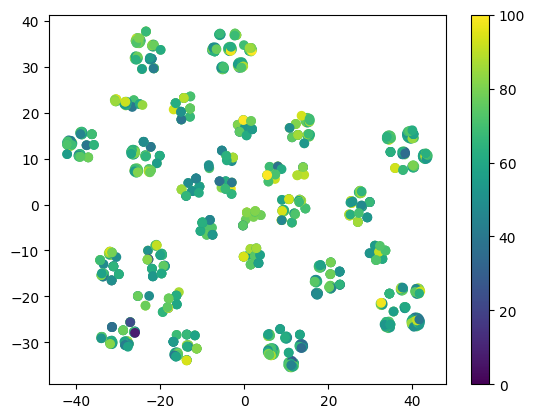

In [43]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Seleccionamos las columnas que vamos a utilizar
X = df_proc.iloc[:, [0,1,2,6,7,8,9,10,11,12,13,14,15,16]].values
y = df_proc.iloc[:, 3:6].values

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)


plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:, 0], cmap='viridis')
plt.colorbar()
plt.show()


[1] P. Jain, "T-SNE Implementation in R & Python," Analytics Vidhya, Jan. 2017. [Online]. Disponible: https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/. [Fecha de acceso: Mayo 10, 2023].

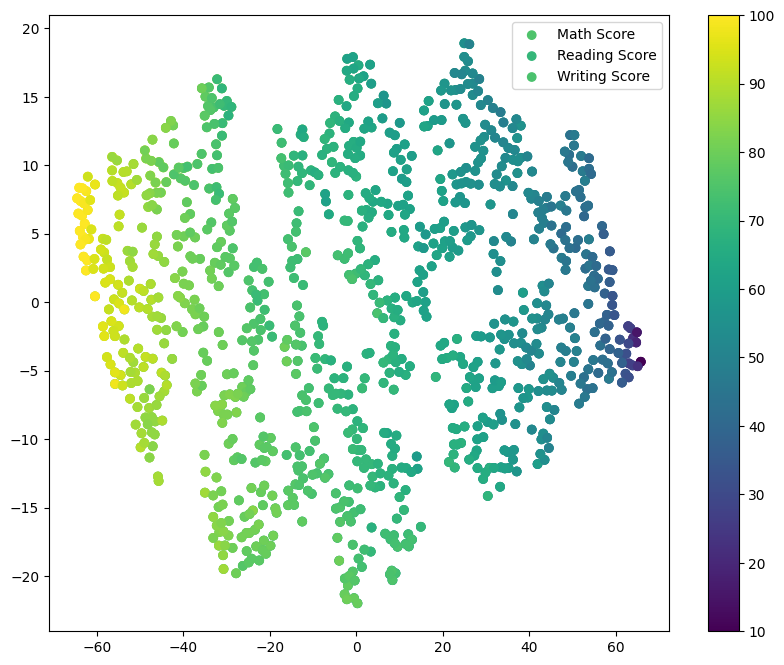

In [68]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Seleccionamos las columnas que vamos a utilizar
X = df_proc

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# Get the indices of the output columns
output_indices = [3, 4, 5]
output_labels = ['Math Score', 'Reading Score', 'Writing Score']

# Plot the data points with different colors for each output column
plt.figure(figsize=(10, 8))
for i in range(len(output_indices)):
    idx = output_indices[i]
    il = output_labels[i]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X.iloc[:, idx].values, cmap='viridis', label=f'{il}')
plt.colorbar()
plt.legend()
plt.show()

[2] C. Chen, "An Introduction to t-SNE with Python (Example)," Towards Data Science, Jul. 18, 2019. [Online]. Disponible en: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1. [Fecha de Acceso: Mayo 10, 2023].

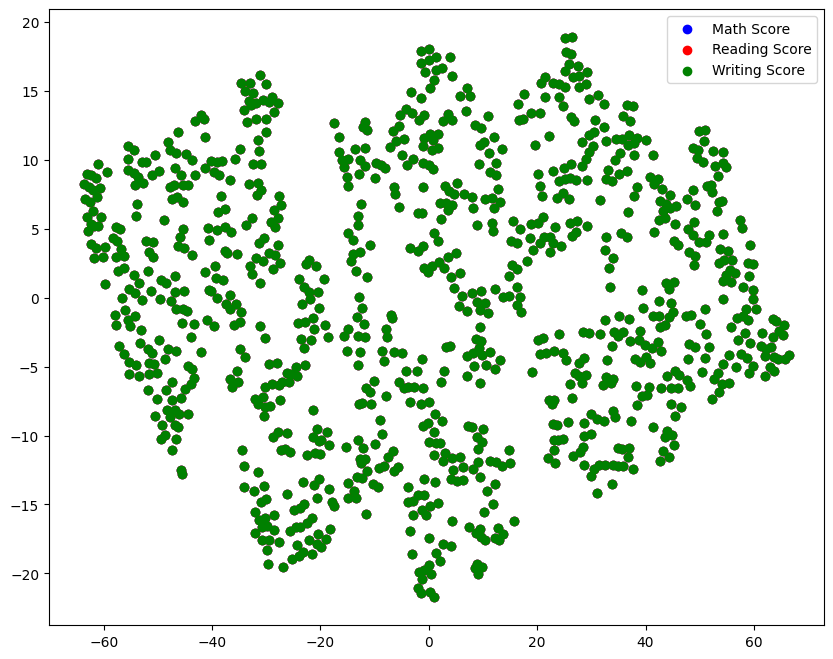

In [66]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Seleccionamos las columnas que vamos a utilizar
X = df_proc

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

# Get the indices of the output columns
output_indices = [3, 4, 5]
output_labels = ['Math Score', 'Reading Score', 'Writing Score']
colors = ['blue', 'red', 'green']

# Plot the data points with different colors for each output column
plt.figure(figsize=(10, 8))
for i in range(len(output_indices)):
    idx = output_indices[i]
    il = output_labels[i]
    #plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X.iloc[:, idx].values, cmap='viridis', label=f'{il}')
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors[i], label=f'{il}')
plt.legend()
plt.show()

In [48]:
# inputs y outputs
math_score_Y = df_proc['math score']
reading_score_Y = df_proc['reading score']
writing_score_Y = df_proc['writing score']

all_X=df_proc.drop(columns =['math score','reading score','writing score'], axis=1)

#all_Y=df_proc['math score','reading score', 'writing score']

# Dividimos el conjunto de entrenamiento y test
all_X_values_train = all_X[:-200] 
all_X_values_test = all_X[-200:] #last 200 for test

#split the targets into training/testing sets
math_score_Y_train = math_score_Y[:-200]
math_score_Y_test = math_score_Y[-200:] 

In [76]:
all_X_values_train.shape

(800, 14)

In [72]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import ttest_rel

#tenemos que usar pipelines, entonces cada tecnica de ML tendra su pipeline
#como uno de los requisitos es que al menos una tecnica de ML sea Regresion Lineal Regularizada
#hacemos el pipe para Lasso
# define pipelines

pipeline_L = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('poly', PolynomialFeatures()),
    #('feature_selection', SelectFromModel(Lasso())),
    ('model', Lasso())
])

#hacemos el pipe para Ridge, con el fin de compararlo con Lasso
pipeline_R = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('poly', PolynomialFeatures()),
    #('feature_sel', SelectFromModel(Lasso())),
    ('model', Ridge())
])

#estos parametros son necesarios para realizar la optimizacion del modelo(encontrar los mejores hiperparametros)
p_L = {'selector__k': range(1, 15),
       'poly__degree':[0,1,2], 
       'model__alpha': [0.1, 1, 10, 100],
       'model__max_iter': [1000, 5000],
       'model__tol': [1e-3, 1e-5]}

p_R = {'selector__k': range(1, 15),
       'poly__degree':[0,1,2], 
       'model__alpha': [0.1, 1, 10, 100],
       'model__max_iter': [1000, 5000],
       'model__tol': [1e-3, 1e-5]}

#repeated k-fold cross validation
#Consulte qué quiere decir estratificado y por qué usted debe o no usarlo en su problema
#
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=26)

#se usa grid search para optimizar los parametros, el conjunto de validacion se utiliza repeated stratified k fold
lasso_search = GridSearchCV(pipeline_L, p_L, cv=10, scoring='r2')
ridge_search = GridSearchCV(pipeline_R, p_R, cv=10, scoring='r2')

#se hace el fit de cada regresion
result_lasso = lasso_search.fit(all_X_values_train, math_score_Y_train)
result_ridge = ridge_search.fit(all_X_values_train, math_score_Y_train)

#se quiere encontrar los mejores hiperparametros
best_hp_lasso = result_lasso.best_params_
best_hp_ridge = result_ridge.best_params_
print("Los mejores hiperparámetros para Lasso son:", best_hp_lasso)
print("Los mejores hiperparámetros para Ridge son:", best_hp_ridge) 

Los mejores hiperparámetros para Lasso son: {'model__alpha': 0.1, 'model__max_iter': 1000, 'model__tol': 0.001, 'poly__degree': 1, 'selector__k': 11}
Los mejores hiperparámetros para Ridge son: {'model__alpha': 100, 'model__max_iter': 1000, 'model__tol': 0.001, 'poly__degree': 1, 'selector__k': 14}


In [74]:
math_score_Y_train.shape

(800,)

[3] "Model evaluation: quantifying the quality of predictions," Scikit-learn. [Online]. Disponible en: https://scikit-learn.org/stable/modules/model_evaluation.html. [Fecha de Acceso: Mayo 10, 2023].

[4] R. Sharma, "Scikit-Learn Pipeline Tutorial with Parameter Tuning and Cross-Validation," Towards Data Science, Feb. 18, 2020. [Online]. Disponible en: https://towardsdatascience.com/scikit-learn-pipeline-tutorial-with-parameter-tuning-and-cross-validation-e5b8280c01fb. [Fecha de Acceso: Mayo 10, 2023].

[5] "sklearn.model_selection.RepeatedStratifiedKFold," Scikit-learn. [Online]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold. [Fecha de Acceso: Mayo 10, 2023].

In [73]:
from sklearn.model_selection import cross_val_score
#conociendo ya los modelos con sus mejores parametros, se vuelve a definir sus pipelines
pipeline_L_best = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=best_hp_lasso['selector__k'])),
    ('poly', PolynomialFeatures(degree=best_hp_lasso['poly__degree'])),
    #('model', Lasso(alpha=best_hp_lasso['model__alpha'], max_iter=best_hp_lasso['model__max_iter'], tol=best_hp_lasso['model__tol']))
    ('model', Lasso(alpha=best_hp_lasso['model__alpha']))
])

#hacemos el pipe para Ridge, con el fin de compararlo con Lasso
pipeline_R_best = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=best_hp_ridge['selector__k'])),
    ('poly', PolynomialFeatures(degree=best_hp_ridge['poly__degree'])),
    #('model', Ridge(alpha=best_hp_ridge['model__alpha'], max_iter=best_hp_ridge['model__max_iter'], tol=best_hp_ridge['model__tol']))
    ('model', Ridge(alpha=best_hp_ridge['model__alpha']))
])

#se desea usar RepeatedStratifiedKfold crossvalidation
rkf = RepeatedStratifiedKFold(n_splits=10,n_repeats=10, random_state=26)

lasso_scores = cross_val_score(pipeline_L_best, all_X_values_train, math_score_Y_train, cv=rkf)
ridge_scores = cross_val_score(pipeline_R_best, all_X_values_train, math_score_Y_train, cv=rkf)

print("Lasso: %0.2f (+/- %0.2f)" % (lasso_scores.mean(), lasso_scores.std() * 2))
print("Ridge: %0.2f (+/- %0.2f)" % (ridge_scores.mean(), ridge_scores.std() * 2))

c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_sp

Lasso: 0.22 (+/- 0.15)
Ridge: 0.22 (+/- 0.14)


[5]

In [77]:
#para cada fold realizado en el cross validation, se calcula el MSE, el R2 y el RMSE
#esto para los mejores modelos de lasso y de ridge
from scipy.stats import wilcoxon

r = 0
f_r = 0

for i in enumerate(rkf.split(all_X_values_train, math_score_Y_train)):
    X_fold_train, Y_fold_train = all_X_values_train.iloc[i[1][0]], math_score_Y_train.iloc[i[1][0]]
    X_fold_test, Y_fold_test = all_X_values_train.iloc[i[1][1]], math_score_Y_train.iloc[i[1][1]]

    pipeline_L_best.fit(X_fold_train, Y_fold_train)
    pipeline_R_best.fit(X_fold_train, Y_fold_train)

    Y_pred_L = pipeline_L_best.predict(X_fold_test)
    Y_pred_R = pipeline_R_best.predict(X_fold_test)

    lasso_mse = mean_squared_error(Y_fold_test, Y_pred_L)
    ridge_mse = mean_squared_error(Y_fold_test, Y_pred_R)

    lasso_rmse = np.sqrt(lasso_mse)
    ridge_rmse = np.sqrt(ridge_mse)

    lasso_r2 = r2_score(Y_fold_test, Y_pred_L)
    ridge_r2 = r2_score(Y_fold_test, Y_pred_R)

    

    print(f"Fold {i[0]}")

    print("Metricas de Lasso:")
    print(f"MSE: {lasso_mse}")
    print(f"R2 score: {lasso_r2}")
    print(f"RMSE: {lasso_rmse}")
    #calculamos el p-value para cada fold usando wilcoxon
    #se usa wilcoxon porque no se sabe si los datos siguen una distribucion normal

    print("\nMetricas de Ridge:")
    print(f"MSE: {ridge_mse}")
    print(f"R2 score: {ridge_r2}")
    print(f"RMSE: {ridge_rmse}")

    #se calcula el p-value para comparar modelos
    stat, p = wilcoxon(Y_pred_L - Y_pred_R)
    print('\nStatistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
        f_r = f_r + 1
    else:
        print('Different distribution (reject H0)')
        r = r + 1

    print("---------------------------------")

print(f"Total de veces que se acepta la hipotesis nula: {f_r}")
print(f"Total de veces que se rechaza la hipotesis nula: {r}")

c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fold 0
Metricas de Lasso:
MSE: 162.68365997465202
R2 score: 0.21822173244878917
RMSE: 12.75475048656978

Metricas de Ridge:
MSE: 159.75205968309177
R2 score: 0.23230957260093288
RMSE: 12.63930613930574

Statistics=1384.000, p=0.258
Same distribution (fail to reject H0)
---------------------------------
Fold 1
Metricas de Lasso:
MSE: 190.4090111152829
R2 score: 0.18280271192247766
RMSE: 13.798877168642488

Metricas de Ridge:
MSE: 193.74346449869327
R2 score: 0.1684919067448064
RMSE: 13.919176142958076

Statistics=1473.000, p=0.481
Same distribution (fail to reject H0)
---------------------------------
Fold 2
Metricas de Lasso:
MSE: 164.15808550346742
R2 score: 0.290548554458405
RMSE: 12.812419190124379

Metricas de Ridge:
MSE: 164.42469997415532
R2 score: 0.28939631135656974
RMSE: 12.822819501738115

Statistics=1453.000, p=0.423
Same distribution (fail to reject H0)
---------------------------------
Fold 3
Metricas de Lasso:
MSE: 171.05962344297458
R2 score: 0.1664548074811426
RMSE: 13.

c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fold 44
Metricas de Lasso:
MSE: 162.7269062936685
R2 score: 0.26849876957498053
RMSE: 12.756445676349996

Metricas de Ridge:
MSE: 161.28310716905338
R2 score: 0.2749890351382951
RMSE: 12.699728625803521

Statistics=1320.000, p=0.150
Same distribution (fail to reject H0)
---------------------------------
Fold 45
Metricas de Lasso:
MSE: 176.28739800610643
R2 score: 0.16007624172234092
RMSE: 13.27732646303865

Metricas de Ridge:
MSE: 174.49420498472963
R2 score: 0.16861993479891524
RMSE: 13.209625467239018

Statistics=1464.000, p=0.454
Same distribution (fail to reject H0)
---------------------------------
Fold 46
Metricas de Lasso:
MSE: 170.87799143276138
R2 score: 0.2736246232892533
RMSE: 13.072030884019567

Metricas de Ridge:
MSE: 173.71063046412354
R2 score: 0.26158352176272415
RMSE: 13.179932870243443

Statistics=1536.000, p=0.687
Same distribution (fail to reject H0)
---------------------------------
Fold 47
Metricas de Lasso:
MSE: 170.90553613771345
R2 score: 0.14063233375992923
RM

c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fold 66
Metricas de Lasso:
MSE: 203.61097182405223
R2 score: 0.1344818889720305
RMSE: 14.26923164799185

Metricas de Ridge:
MSE: 200.2210003328991
R2 score: 0.14889212283701592
RMSE: 14.149947008130423

Statistics=1601.000, p=0.927
Same distribution (fail to reject H0)
---------------------------------
Fold 67
Metricas de Lasso:
MSE: 148.05343567058807
R2 score: 0.2555399996607741
RMSE: 12.167721054930052

Metricas de Ridge:
MSE: 150.0332564506306
R2 score: 0.2455848279222309
RMSE: 12.248806327582725

Statistics=1452.000, p=0.420
Same distribution (fail to reject H0)
---------------------------------
Fold 68
Metricas de Lasso:
MSE: 218.59822253053136
R2 score: 0.1795857525311808
RMSE: 14.785067552450728

Metricas de Ridge:
MSE: 218.15199303499716
R2 score: 0.1812604826892722
RMSE: 14.769969297022833

Statistics=1572.000, p=0.818
Same distribution (fail to reject H0)
---------------------------------
Fold 69
Metricas de Lasso:
MSE: 192.57118963538954
R2 score: 0.1999488379421014
RMSE: 1

c:\Users\valex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


[6] "scipy.stats.wilcoxon," SciPy v1.7.1 Reference Guide. [Online]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html. [Fecha de Acceso: May. 10, 2023].

In [78]:
from scipy.stats import wilcoxon

#diferencia entre cross_val_scores de lasso y ridge
score_diff = lasso_scores - ridge_scores

#con la diferencia se hace el test de wilcoxon
statistic, pvalue = wilcoxon(score_diff)

print("Test de Wilcoxon:")
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

Test de Wilcoxon:
Statistic: 2245.0
P-value: 0.3356825574357155


[6]

In [79]:
from scipy.stats import ttest_rel

#Es posible usar ttest_rel en lugar de wilcoxon
#se obtiene el t_value y el p_value
#t_value es la diferencia entre las medias de los scores dividida por la desviacion estandar de la diferencia
#p_value es la probabilidad de que la diferencia entre las medias sea 0.05
t_value, p_value = ttest_rel(lasso_scores, ridge_scores)

print("t-value:", t_value)
print("p-value:", p_value)

t-value: -0.9491768466911789
p-value: 0.3448420119862705


[7] "scipy.stats.ttest_rel." SciPy v1.7.1 Reference Guide. [Online]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html. [Fecha de Acceso: Mayo 10, 2023].

In [80]:
#se importan las metricas de sklearn
from sklearn.metrics import mean_squared_error, r2_score

#se reentrena con los mejores hiperparametros encontrados
pipeline_L_best.fit(all_X_values_train, math_score_Y_train)
pipeline_R_best.fit(all_X_values_train, math_score_Y_train)

# Make predictions on the test set for both models
lasso_preds = pipeline_L_best.predict(all_X_values_test)
ridge_preds = pipeline_R_best.predict(all_X_values_test)

# Calculate the MSE for both models
lasso_mse = mean_squared_error(math_score_Y_test, lasso_preds)
ridge_mse = mean_squared_error(math_score_Y_test, ridge_preds)

# Calculate the R2 score for both models
lasso_r2 = r2_score(math_score_Y_test, lasso_preds)
ridge_r2 = r2_score(math_score_Y_test, ridge_preds)

# Calculate the RMSE for both models
lasso_rmse = mean_squared_error(math_score_Y_test, lasso_preds, squared=False)
ridge_rmse = mean_squared_error(math_score_Y_test, ridge_preds, squared=False)

print("Lasso metrics:")
print(f"MSE: {lasso_mse}")
print(f"R2 score: {lasso_r2}")
print(f"RMSE: {lasso_rmse}")

print("Ridge metrics:")
print(f"MSE: {ridge_mse}")
print(f"R2 score: {ridge_r2}")
print(f"RMSE: {ridge_rmse}")

Lasso metrics:
MSE: 177.98991320897957
R2 score: 0.2704135382481573
RMSE: 13.34128604029535
Ridge metrics:
MSE: 178.0401751381943
R2 score: 0.27020751296034484
RMSE: 13.343169606139101


[3]